In [2]:
import numpy as np
import pandas as pd


In [ ]:
transaction = pd.read_excel('customer_and_transaction.xlsx')



1NF: Все атрибуты являются атомарными, то есть каждый столбец содержит только одно значение.

2NF: Все некандидатные атрибуты зависят от первичного ключа. В каждой таблице (product, transaction, customer) нет частичных зависимостей.

3NF: Нет транзитивных зависимостей. То есть, атрибуты не зависят от других неключевых атрибутов.

наша таблица находится в третьей нормальной форме

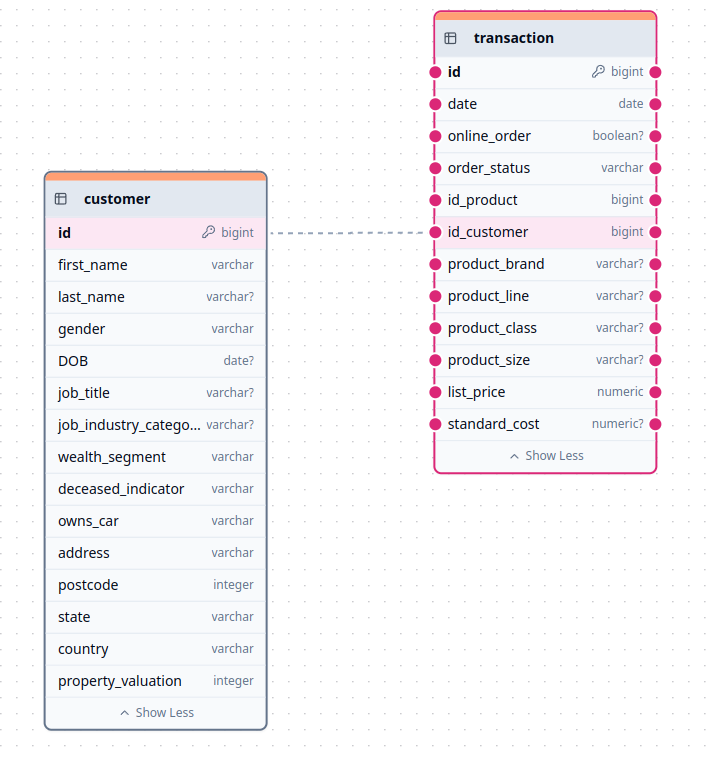

Можно было отделить 'product' от 'transaction', однако 'id' в 'product' не имеют уникальных значений и идентифицируются только в связке с другими данныи, поэтому что бы не потерять много объектов, я сделал только две таблицы


### Ниже sql скрипт для создания таблиц

```SQL

CREATE TABLE customer (
  id bigint NOT NULL PRIMARY KEY,
  first_name varchar(100) NOT NULL,
  last_name varchar(100),
  gender varchar(100) NOT NULL,
  DOB date,
  job_title varchar(100),
  job_industry_category varchar(100),
  wealth_segment varchar(100) NOT NULL,
  deceased_indicator varchar(100) NOT NULL,
  owns_car varchar(100) NOT NULL,
  address varchar(100) NOT NULL,
  postcode integer NOT NULL,
  state varchar(100) NOT NULL,
  country varchar(100) NOT NULL,
  property_valuation integer NOT NULL
);

CREATE TABLE transaction (
  id bigint NOT NULL PRIMARY KEY,
  date date NOT NULL,
  online_order boolean,
  order_status varchar(100) NOT NULL,
  id_product bigint NOT NULL,
  id_customer bigint NOT NULL,
  product_brand varchar(100),
  product_line varchar(100),
  product_class varchar(100),
  product_size varchar(100),
  list_price numeric NOT NULL,
  standard_cost numeric,
  CONSTRAINT customer_id_fk FOREIGN KEY (id_customer) REFERENCES customer(id)
);

```

подготовим данные в csv, потому что psql не хочет парсить xlsx
 

In [130]:
transaction.rename(columns={'transaction_id':'id', 'product_id':'id_product', 'customer_id':'id_customer', 'transaction_date':'date', 'brand':'product_brand'}, inplace=True)
transaction = transaction[transaction['id_customer'] != 5034]
transaction.to_csv('transaction.csv', index=False)

In [115]:
cr = pd.read_excel('customer_and_transaction.xlsx', sheet_name='customer')
cr.rename(columns={'customer_id':'id'}, inplace=True)
cr.to_csv('customer.csv', index=False)

скопируем данные в sql, скриптом ниже

```sql
\COPY customer (id, first_name, last_name, gender, DOB, job_title, job_industry_category, wealth_segment, deceased_indicator, owns_car, address, postcode, state, country, property_valuation)
FROM 'path/customer.csv'
WITH (FORMAT CSV, HEADER);

\COPY transaction (id, id_product, id_customer, date, online_order, order_status, product_brand, product_line, product_class, product_size, list_price, standard_cost)
FROM 'path/transaction.csv'
WITH (FORMAT CSV, HEADER);
```

### Скриншоты из DBeaver с подтверждением, что данные попали в таблицу

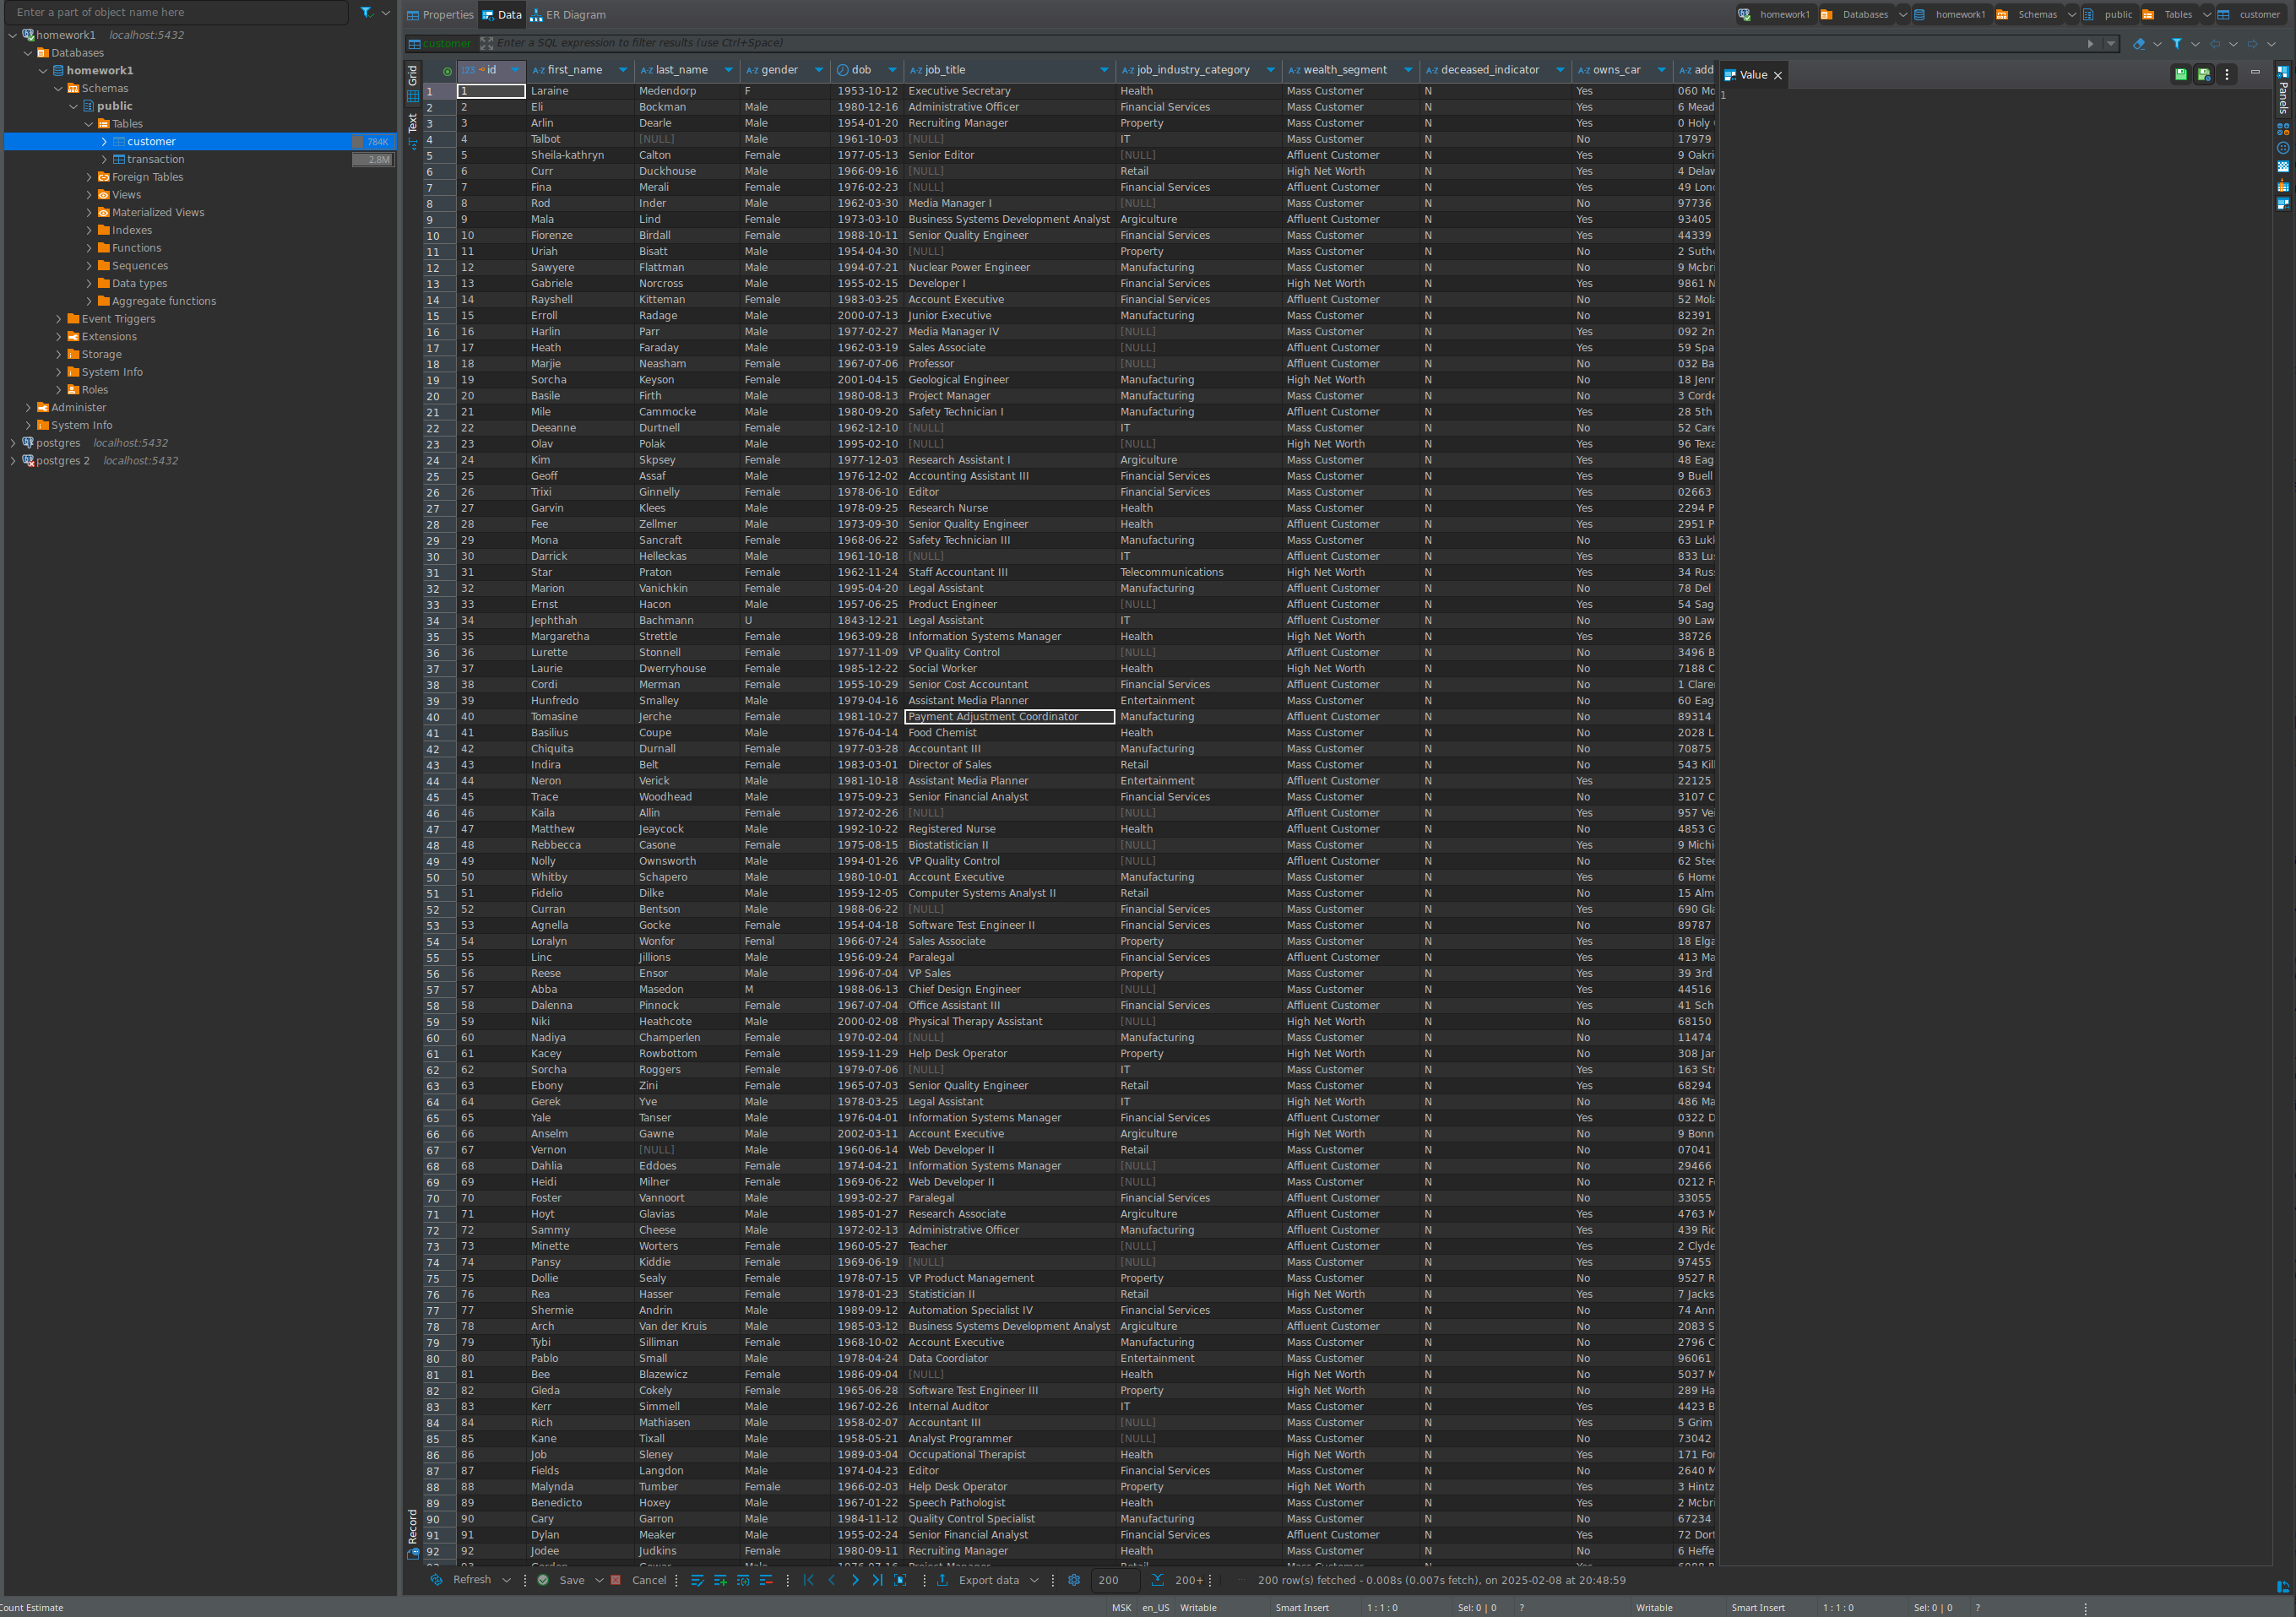

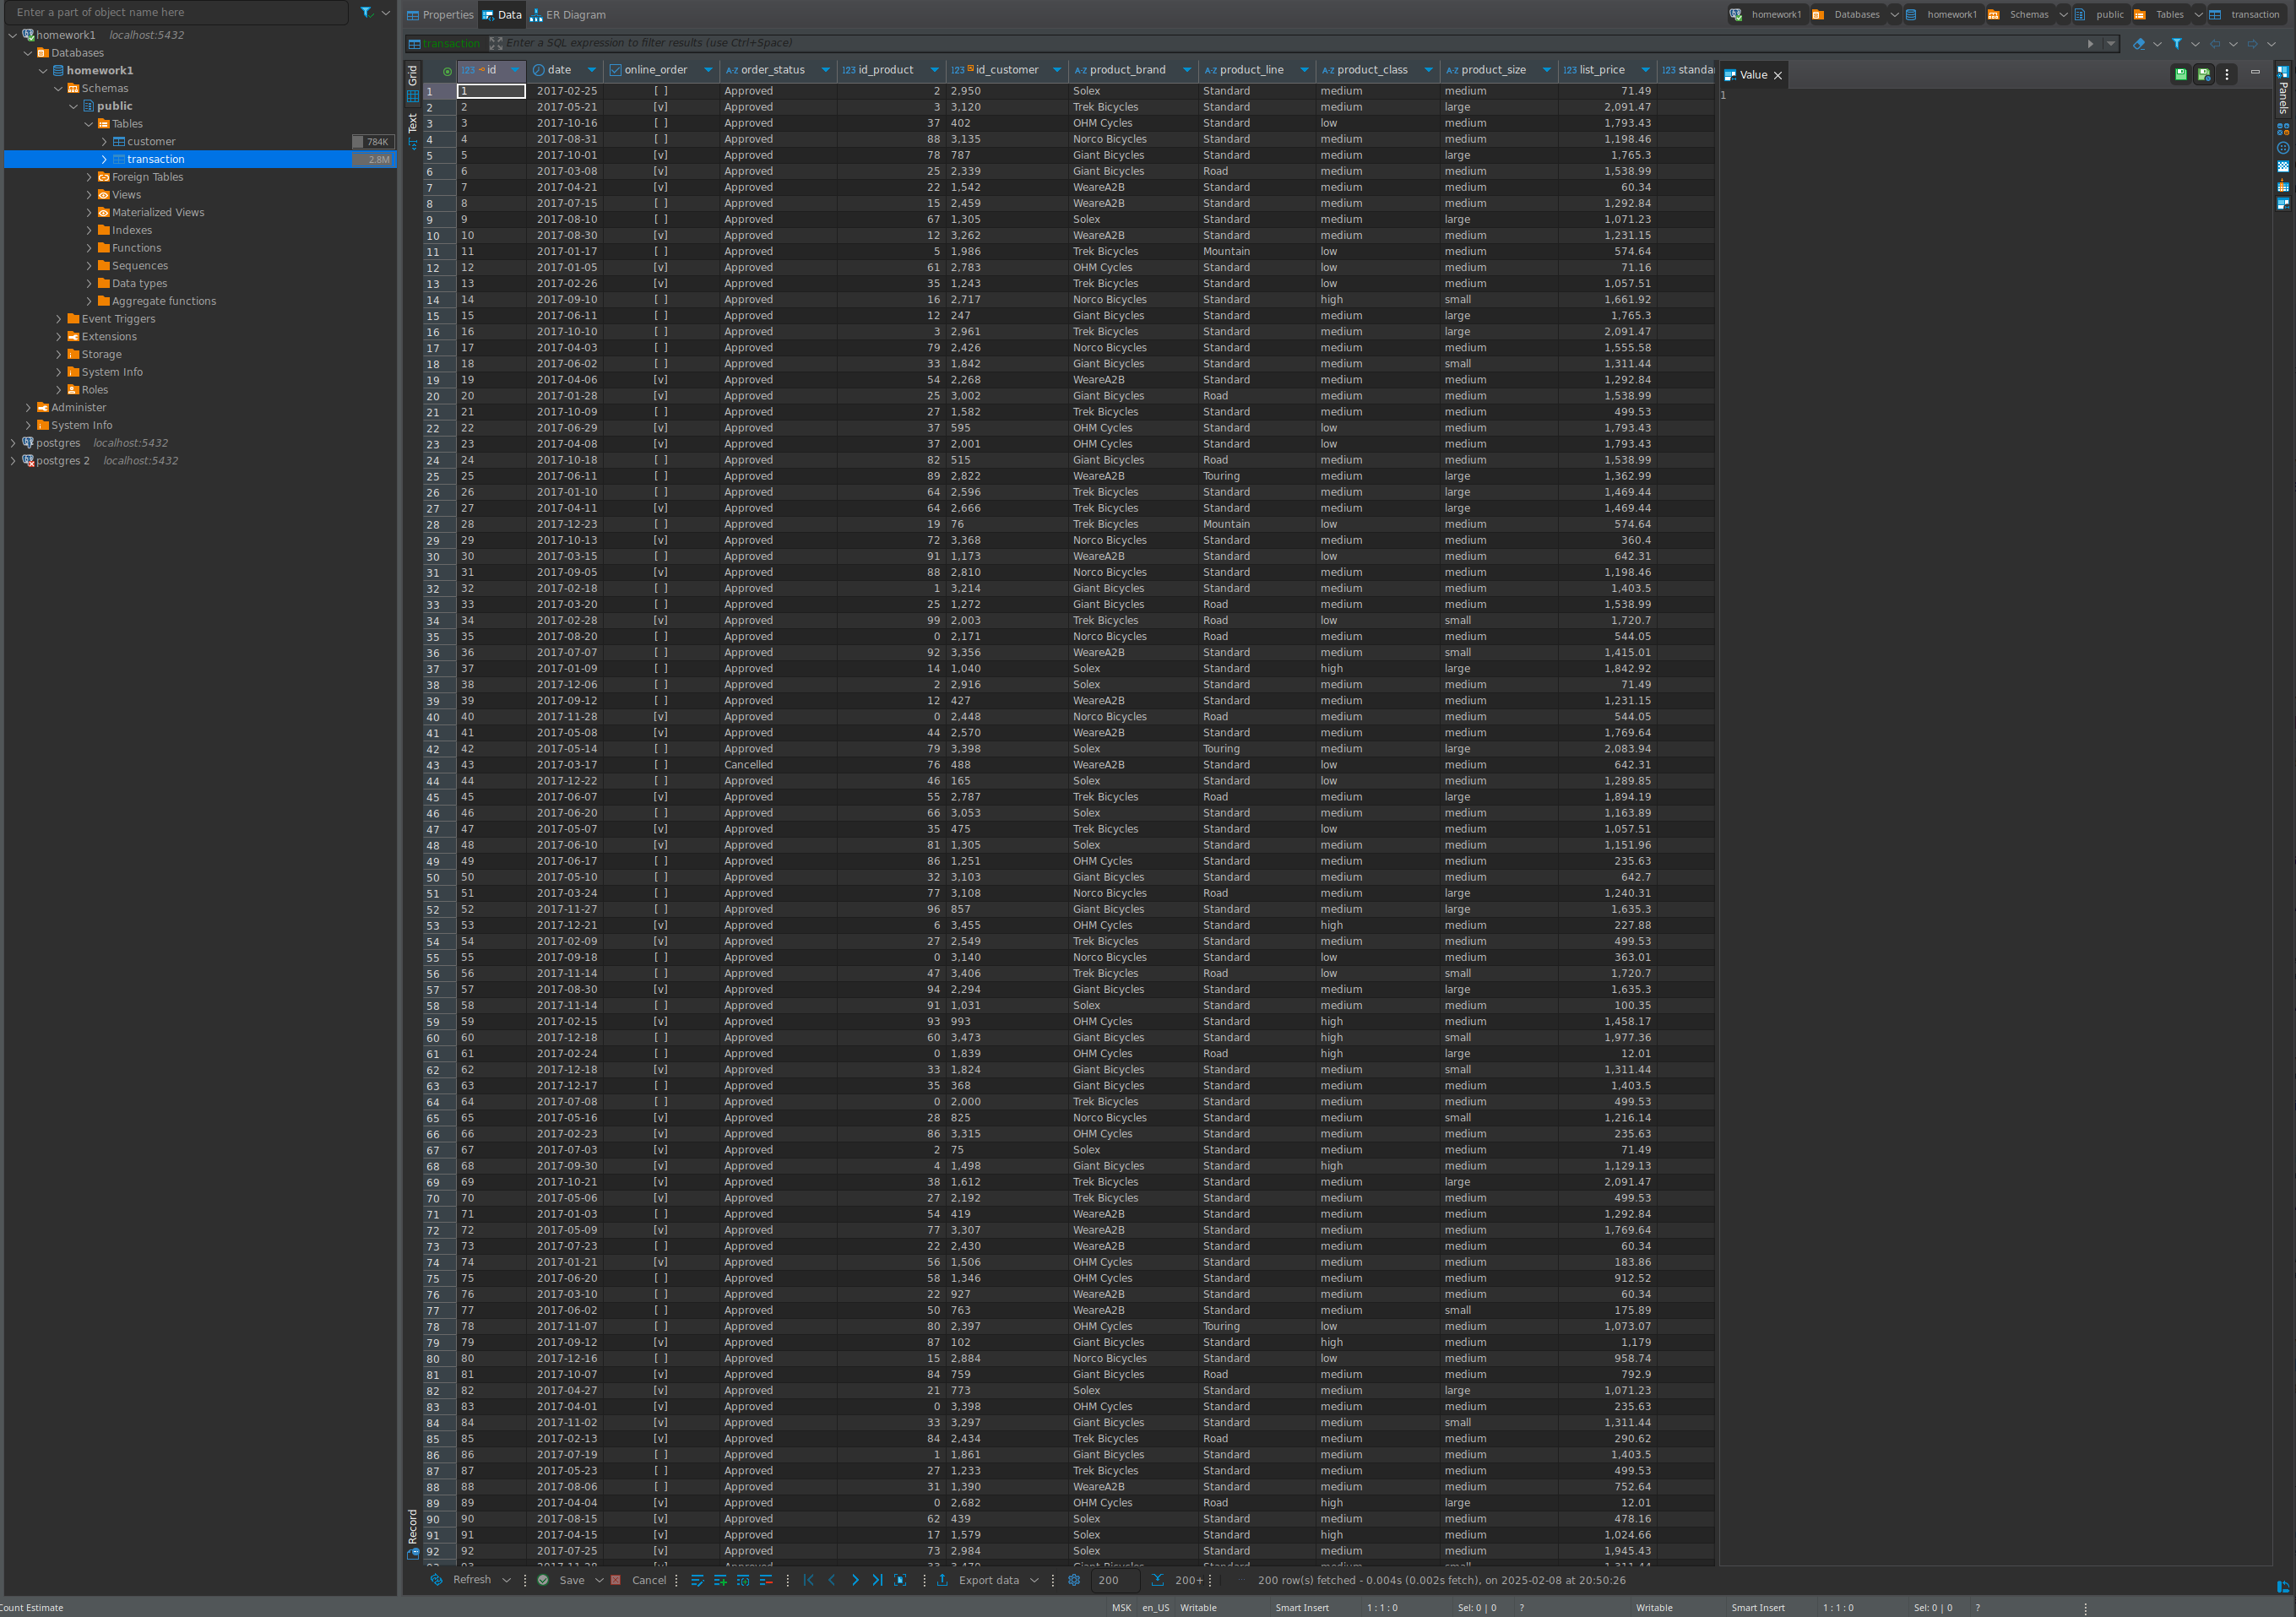